In [1]:
import numpy as np
import pylab
import pandas as pd
from scipy.stats import linregress
from matplotlib.colors import LogNorm
from numpy import polyfit
from scipy.optimize import brenth
from scipy.interpolate import interp1d,UnivariateSpline
import seaborn as sns

%matplotlib inline

In [2]:
files = ['sizeDistri_poly_34.txt','sizeDistri_poly_56.txt','sizeDistri_poly_78.txt']
dataframes = ['df_4','df_6','df_8']
for df,file in zip(dataframes,files):
    globals()[df] = pd.read_csv(file, sep='\t', header=None)
    
for df in [df_4,df_6,df_8]:
    df.columns = ['NSIM', 'NSUMO', 'LSIM', 'LSUMO', 'beta', 'gamma','ClusterSize']


In [3]:
def get_proba(df, LSIM):
    meanval = df[df.LSIM==LSIM].groupby(['NSUMO'])['ClusterSize'].mean()    
    errors = df[df.LSIM==LSIM].groupby(['NSUMO'])['ClusterSize'].std()
    ddf = meanval.to_frame()
    #errors = errors.to_frame()
    #ddf['errors'] = errors['ClusterSize']
    ddf.reset_index(inplace=True)
    k = ddf.groupby(['NSUMO']).mean().reset_index()
    return k

# Figure panel a, b, c

In [9]:
def PlotCluster(df, LRubi, panel):
    D = 50
    colors = [ '#009e73','#d55e00']
    fig, ax = pylab.subplots()
    
    for LEPYC, color in zip(range(LRubi-1,LRubi+1),colors):
        pylab.plot(get_proba(df,LEPYC).NSUMO*LRubi/(D**2),get_proba(df,LEPYC).ClusterSize,color = color, ls='-', linewidth=2, label=str(LEPYC))
    
    #ax.legend(loc='lower right', bbox_to_anchor=(0.9, 0.1),fontsize=12,frameon=False)
    pylab.ylabel("Average Cluster Size", fontsize = 14)
    pylab.xlabel("Polymer Concentration", fontsize = 14)
    #pylab.rc('xtick', labelsize=0.0)
    #pylab.rc('ytick', labelsize=0.0)
    #ax.set_xticklabels([])
    #ax.set_yticklabels([])
    ax.tick_params(axis='both', which='both', direction='in')
    pylab.semilogy()
    pylab.ylim(0,5000)
    pylab.savefig('/Users/guanhuahe/Desktop/'+panel+'.png',dpi=500)

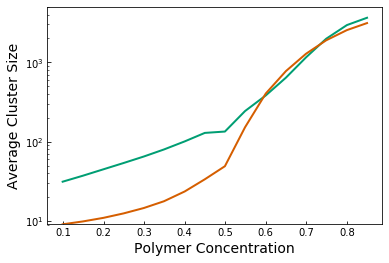

In [10]:
PlotCluster(df_4, 4, 'a')

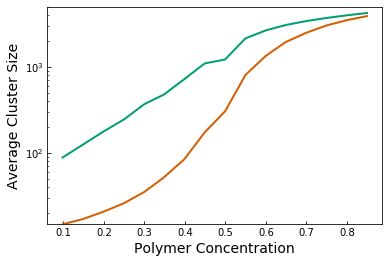

In [11]:
PlotCluster(df_6, 6, 'b')

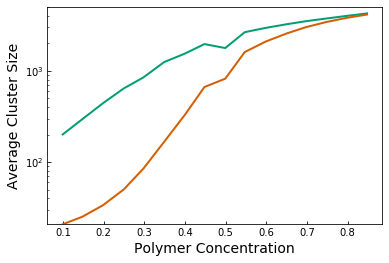

In [12]:
PlotCluster(df_8, 8, 'c')